# Régression et lissage

Contrairement aux [méthodes d'interpolation](interpolation) qui consistent à faire passer une fonction par un ensemble de points fixés, les [méthodes de regression](https://fr.wikipedia.org/wiki/Ajustement_de_courbe) consistent à approcher un ensemble de points par une courbe de forme donnée.

Les méthodes de [regressions statistiques](https://fr.wikipedia.org/wiki/Ajustement_de_courbe) sont les ancêtres historiques des méthods modernes d'[apprentissage automatique / _machine learning_](https://fr.wikipedia.org/wiki/Apprentissage_automatique) et constituent donc une excellente introduction à l'[analyse statistique des données](https://fr.wikipedia.org/wiki/Analyse_des_donn%C3%A9es) et au [traitement du signal](https://fr.wikipedia.org/wiki/Traitement_du_signal).

In [1]:
import matplotlib.pyplot as plt
import random as r

import regression as reg

## Problème d'ajustement

Supposons que l'on ait une série de données $\left\{ \left(x_{i},y_{i}\right)\right\} _{i=0}^{N-1}$.

On suppose que ces données sont distribuées _autour_ d'une droite d'équation $\hat{y}_{i}=\alpha x_{i} + \beta$. On cherche à déterminer $\alpha$ et $\beta$. 

On va chercher à [optimiser](https://en.wikipedia.org/wiki/Optimization_problem) $\alpha$ et $\beta$ tels que la **fonction d'erreur** (_loss_ en anglais, cette fonction est posée à priori sur des considérations pratiques)

$$
\ell\left(y_{i},\hat{y}_{i}\right)=\frac{1}{2}\sum_{i=0}^{N-1}\left(y_{i}-\hat{y}_{i}\right)^{2}
$$

soit **minimale**.

```{admonition} Notion de données distribuées _autour_ d'une courbe
:class: hint
Lorsque l'on dit que l'on suppose que les données sont distribués autour d'une courbe d'équation définie, on sous-entend qu'il existe un bruit additif gaussien au delà de l'équation. 

Par exemple dans le cas de la régression linéaire comme ici, on suppose que le modèle liant résultats et valeurs mesurables est de la forme générale $y^{i}=\alpha + \beta x^{i} + \epsilon^{i}$ avec $\left(\alpha,\beta,x^{i},y^{i}\right)\in\mathbb{R}^{4}$. Surtout, on suppose dans ce modèle que $\epsilon^{i}$ est une notion de [bruit gaussien](https://en.wikipedia.org/wiki/White_noise) qui entâche les mesures c'est-à-dire qu'il est distribué comme une loi normale réduite centrée. Dans ces conditions, on peut montrer que la droite de régression obtenue par la méthode des moindres carrés est la courbe optimale (au sens de [Fisher](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation#Continuous_distribution,_continuous_parameter_space)) minimisant le bruit sur les données.
```

## Méthode des moindres carrés

Optimiser une fonction par rapport à des variables, c'est trouver son minimum ou maximum. C'est donc trouver les zéros de ses dérivées par rapport à l'ensemble de ses variables. 

Ici on a 

$$\left.\frac{\partial\ell}{\partial\beta}\right|_{\left(\alpha_{0},\beta_{0}\right)}=0\Rightarrow-\sum_{i=0}^{N-1}\left(y_{i}-\alpha_{0}x_{i}-\beta_{0}\right)=0\Rightarrow\beta_{0}=\bar{y}-\alpha_{0}\bar{x}$$

où $\bar{x}={\displaystyle \frac{1}{N}}{\displaystyle \sum_{i=1}^{N-1}}x_{i}$ et $\bar{y}={\displaystyle \frac{1}{N}}{\displaystyle \sum_{i=1}^{N-1}}y_{i}$, et 

$$\left.\frac{\partial\ell}{\partial\alpha}\right|_{\left(\alpha_{0},\beta_{0}\right)}=0\Rightarrow-\sum_{i=0}^{N-1}x_{i}\left(y_{i}-\alpha_{0}x_{i}-\beta_{0}\right)=0\Rightarrow\alpha_{0}=\frac{{\displaystyle \frac{1}{N}}{\displaystyle \sum_{i=0}^{N-1}}x_{i}y_{i}-\bar{x}\bar{y}}{{\displaystyle \frac{1}{N}}{\displaystyle \sum_{i=0}^{N-1}}x_{i}^{2}-\bar{x}^{2}}$$

In [2]:
N = 25 # sample size
x = [5*r.random() for _ in range(N)]
x.sort()
epsilon = [0.5 * r.gauss(mu=0.0, sigma=1.0) for _ in range(N)]

y = [2 + 3*x[i] + epsilon[i] for i in range(N)]

alpha, beta = reg.linear_fit(x, y)

y_fit = [alpha*x[i] + beta for i in range(N)]

plt.scatter(x, y, c='orange')
plt.plot(x, y_fit, c='lightgreen',
         label="{:.4} x + {:.4}".format(beta,alpha))
plt.title("Example of linear regression $y = f(x)$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

## Prédiction à partir du modèle

Une fois le modèle optimisé, on peut facilement calculer n'importe quel point $\hat{y}_{i}=\alpha x_{i}+\beta$ prédisant _au mieux_ la valeur $y_{i}$ en regard de la donnée $x_{i}$. On appelle ce calcul une **prédiction** à partir du modèle.

## Erreur entre le modèle et l'échantillon

### Root mean square deviation

On peut mesurer l'erreur entre le modèle $\hat{y}_{i}$ et les données $y_{i}$ en calculant la _root-mean-square deviation_ (racine carré de l'écart quadratique résiduel en français)

$$
\mathbb{RMS}\left(y_{i},\hat{y}_{i}\right)=\sqrt{\frac{1}{N}\sum_{i=0}^{N-1}\left(y_{i}-\hat{y}_{i}\right)^{2}}
$$

Cette fonction est simplement la racine carrée de la fonction de coût du modèle. Elle permet de donner une appréciation de la qualité de la régression.

### Coefficient de corrélation de Pearson

Le [coefficient de corrélation de Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) $r_{\text{P}}\left(X,Y\right)$ d'un échantillon $\left\{ \left(x_{i},y_{i}\right)\right\} _{i=0}^{N-1}$ correspondant aux données de deux variables aléatoires $X$ et $Y$ se calcule comme

$$
r_{\text{P}}\left(X,Y\right)=\frac{{\displaystyle \sum_{i=0}^{N-1}}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{{\displaystyle \sum_{i=0}^{N-1}}\left(x_{i}-\bar{x}\right)^{2}}\sqrt{{\displaystyle \sum_{i=0}^{N-1}}\left(y_{i}-\bar{y}\right)^{2}}}
$$

Ce coefficient est une mesure de la dépendance entre les variables $X$ et $Y$. Il est borné sur l'intervale $\left[-1,1\right]$. Si les données aléatoires n'ont pas un bon coefficient de Pearson (c'est-à-dire un coefficient de Pearson proche de $\pm 1$), la régression linéaire ne sera pas probante. En revanche, avoir un bon coefficient de Pearson n'est pas suffisant pour justifier la regression linéaire par la méthode des moindres carrés.

In [3]:
rms = reg.root_mean_square(y, y_fit)
rms

0.4382609481179989

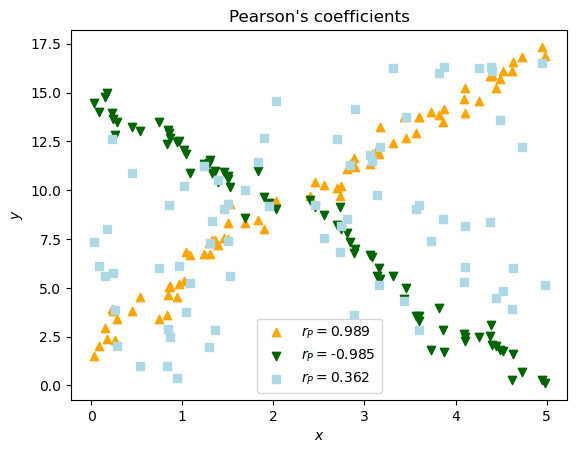

In [4]:
N = 75 # sample size
x = [5*r.random() for _ in range(N)]
x.sort()
epsilon = [0.5 * r.gauss(mu=0.0, sigma=1.0) for _ in range(N)]
y1 = [2 + 3*x[i] + epsilon[i] for i in range(N)]
x = [5*r.random() for _ in range(N)]
x.sort()
epsilon = [0.5 * r.gauss(mu=0.0, sigma=1.0) for _ in range(N)]
y2 = [15 - 3*x[i] + epsilon[i] for i in range(N)]
x = [5*r.random() for _ in range(N)]
x.sort()
epsilon = [r.uniform(-7, 7) for _ in range(N)]
y3 = [6 + x[i] + epsilon[i] for i in range(N)]

pearson1 = reg.correlation(x, y1)
pearson2 = reg.correlation(x, y2)
pearson3 = reg.correlation(x, y3)

plt.scatter(x, y1, c='orange', marker="^",
            label="$r_{P}=$" + f"{pearson1:.3f}")
plt.scatter(x, y2, c='darkgreen', marker="v",
            label="$r_{P}=$" + f"{pearson2:.3f}")
plt.scatter(x, y3, c='lightblue', marker="s",
            label="$r_{P}=$" + f"{pearson3:.3f}")
plt.title(f"Pearson's coefficients")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

## Aller plus loin

La méthode des moindres carrés est décrite dans l'article [_ordinary least squares method_](https://en.wikipedia.org/wiki/Ordinary_least_squares) sur Wikipédia. 

Un problème de [_machine learning_](https://en.wikipedia.org/wiki/Machine_learning) consiste à se donner: 

 - un jeu de données $\left\{ \left(x_{i},y_{i}\right)\right\} _{i=0}^{N-1}$
 - une fonction d'ajustement $\hat {y}_{i}$ fonction des $x_{i}$
 - une fonction de coût $\ell\left(y_{i},\hat{y}_{i}\right)$

et à optimiser les coefficients de la fonction d'ajustement à l'aide de la fonction de coût. 

Un problème de [**régression**](https://en.wikipedia.org/wiki/Regression_analysis) consiste à trouver les meilleurs coefficients de la fonction d'ajustement qui correspondent _au mieux_ aux données.

Un problème de [**classification**](https://en.wikipedia.org/wiki/Statistical_classification) consiste à trouver la meilleure fonction d'ajustement permettant de séparer _au mieux_ les différentes classes de données.

Pour le lissage des courbes, voir l'[algorithme de Savitzky-Golay](https://fr.wikipedia.org/wiki/Algorithme_de_Savitzky-Golay), une généralisation de la moyenne mobile pour les séries temporelles.